### Import required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
epochs = 10 
batch_size=64

In [2]:
import tensorflow as tf


In [3]:
import torch 
import torchvision

### Load and Preprocessing Data

In [6]:
(x_trainTF_, y_trainTF_), _ = tf.keras.datasets.mnist.load_data() 
x_trainTF = x_trainTF_.reshape(60000, 784).astype('float32')/255 
y_trainTF = tf.keras.utils.to_categorical(y_trainTF_, num_classes=10)

11493376/11490434 [==============================] - 8s 1us/step


In [12]:
type(x_trainTF)

numpy.ndarray

In [15]:
x_trainTF_.shape

(60000, 28, 28)

In [16]:
x_trainTF.shape

(60000, 784)

In [17]:
y_trainTF_.shape

(60000,)

In [18]:
y_trainTF.shape

(60000, 10)

In [20]:
xy_trainPT = torchvision.datasets.MNIST(root='./data', train=True, download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])) 
xy_trainPT_loader = torch.utils.data.DataLoader(xy_trainPT, batch_size=batch_size)

Processing
Done!


### We can verify that both codes have loaded the same data with the library matplotlib.pyplot

TensorFlow:


<ipython-input-22-65a9c89c03aa>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


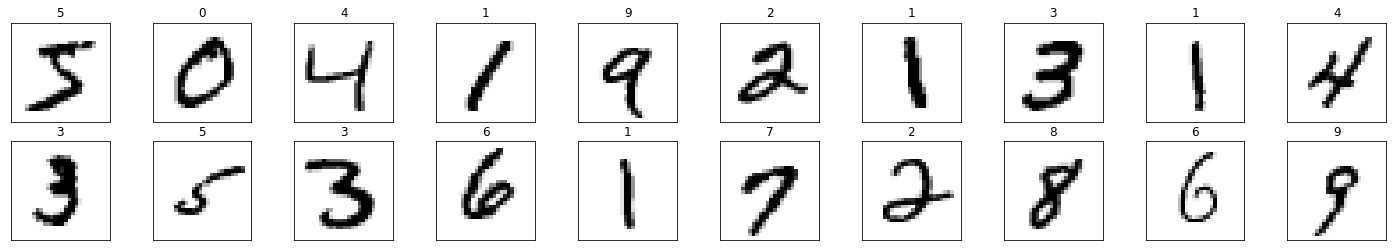

In [22]:
print("TensorFlow:")
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(x_trainTF_[idx], cmap=plt.cm.binary)
   ax.set_title(str(y_trainTF_[idx]))

PyTorch:


<ipython-input-24-7d826b6bd75b>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


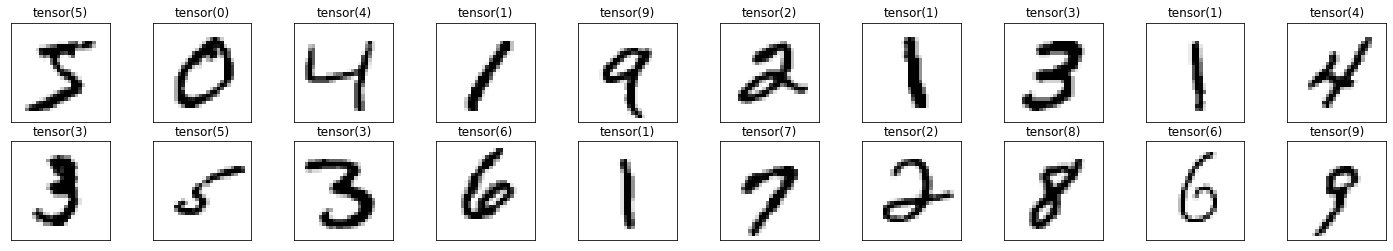

In [24]:
print("PyTorch:")
fig = plt.figure(figsize=(25, 4)) 
for idx in np.arange(20):
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   image, label = xy_trainPT [idx]
   ax.imshow(torch.squeeze(image, dim = 0).numpy(), 
             cmap=plt.cm.binary)
   ax.set_title(str(label))

### Define Model

In [25]:
modelTF = tf.keras.Sequential([ tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,)), tf.keras.layers.Dense(10,activation='softmax') 
])

In [26]:
modelPT= torch.nn.Sequential(   
         torch.nn.Linear(784,10),
         torch.nn.Sigmoid(), 
         torch.nn.Linear(10,10), 
         torch.nn.LogSoftmax(dim=1) 
         )

### Define the Optimizer and the Loss function

In [27]:
modelTF.compile( 
               loss="categorical_crossentropy",     
               optimizer=tf.optimizers.SGD(lr=0.01), 
               metrics = ['accuracy'] 
               )

In [28]:
criterion = torch.nn.NLLLoss() 
optimizer = torch.optim.SGD(modelPT.parameters(), lr=0.01)

### Train the model

In [29]:
_ = modelTF.fit(x_trainTF, y_trainTF, epochs=epochs, batch_size=batch_size, verbose = 0)

In [30]:
for e in range(epochs):
    for images, labels in xy_trainPT_loader:
        images = images.view(images.shape[0], -1)
        loss = criterion(modelPT(images), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

### Evaluate the Model

In [31]:
_, (x_testTF, y_testTF)= tf.keras.datasets.mnist.load_data()
x_testTF = x_testTF.reshape(10000, 784).astype('float32')/255
y_testTF = tf.keras.utils.to_categorical(y_testTF, num_classes=10)

_ , test_accTF = modelTF.evaluate(x_testTF, y_testTF)
print('\nAccuracy del model amb TensorFlow =', test_accTF)

313/313 [==============================] - 1s 2ms/step - loss: 0.6148 - accuracy: 0.8691: 0s - loss: 0.6993 - accu

Accuracy del model amb TensorFlow = 0.8690999746322632


In [32]:
xy_testPT = torchvision.datasets.MNIST(root='./data', train=False, download=True, 
            transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

xy_test_loaderPT = torch.utils.data.DataLoader(xy_testPT)

correct_count, all_count = 0, 0
for images,labels in xy_test_loaderPT:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    logps = modelPT(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("\nAccuracy del model amb PyTorch =", (correct_count/all_count))

Files already downloaded

Accuracy del model amb PyTorch = 0.8426


### And even more that they will converge!

2. And even more that they will converge!
Well, as shown in this simple example, the way it can be created a neural network in TensorFlow and PyTorch doesn’t really differ, except in some details regarding the way that the programmer has to implement the training and evaluation loop, and some hyperparameters like epochs or batch_size are specified in different steps.
In fact, these two frameworks have been constantly converging over the last two years, learning from each other and adopting their best features. For example, in the new version of TensorFlow 2.2 announced a couple of weeks ago, the training step can be done equal to PyTorch, now the programmer can specify a detailed content of the body of the loop by implementing the traint_step(). So do not worry about choosing the “wrong” framework, they will converge! The most important thing is to learn the Deep Learning concepts behind, and all the knowledge you acquire in one of the frameworks will be useful to you in the other.
3. Production or Research?
However, it is clear that it is different if what you want is to put into production a solution or do research in neural networks. In this case, the decision of which one to choose is important.
TensorFlow is a very powerful and mature Python library with strong visualization features and a variety of options for high performance model development. It has rollout options ready for production and automatic support for web and mobile platforms.
PyTorch, on the other hand, is still a young framework but with a very active community especially in the world of research. The portal The Gradient shown in the attached figure the rise and adoption of PyTorch the research community based on the number of research papers published in major conference theme (CVPR, ICRL, ICML, NIPS, ACL, ICCV, etc.).

 in 2018, the use of the PyTorch framework was minority, compared to 2019 which is overwhelming its use by researchers. Therefore, if you want to create products related to artificial intelligence, TensorFlow is a good choice. I recommend PyTorch if you want to do research.

4. When in doubt, opt for Keras
If you’re not sure, start with TensorFlow’s Keras API. PyTorch’s API has more flexibility and control, but it’s clear that TensorFlow’s Keras API can be easier to get started. And if you are reading this post I can assume that you are starting in the topic of Deep Learning.
In addition, you have extra documentation about Keras in other publications that I have prepared for the last two years. (One secret: I plan to have PyTorch equivalent documentation ready in the summer, too).
By the way, Keras has several novelties planned for this 2020 that are in the line of “making it easier”. Here’s a list of some of the new features that have been recently added or announced that will be coming soon:
Layers and preprocessing APIs
So far we have done preprocessing with auxiliary tools written in NumPy and PIL (Python Imaging Library). And this kind of external preprocessing makes models less portable, because every time someone reuses an already trained model, they have to replay the preprocessor pipeline. Therefore, preprocessing can now be part of the model, through “preprocessing layers”. This includes aspects such as text standardization, tokenization, vectorization, image normalization, data augmentation, etc. That is, this will allow models to accept raw text or raw images as input. I personally think this will be very interesting.
Keras Tuner
It is a framework that allows you to find the best hyperparameters of a model in Keras. As you spend some time working in Deep Learning, you will see that this solves one of the costly problems of model building, such as refining the hyperparameters so that the model is performing best. It is always a very difficult task.
AutoKeras
This project seeks to find a good ML model for data in a few lines of code, automatically searching the best possible model according to a space of possible models, and using Keras Tuner finding for hyperparameters tuning. For advanced users, AutoKeras also allows a higher level of control over the configuration of the search space and process.
Cloud Keras
The vision is to make it easier for the programmer to move a code (that works locally on our laptop or Google Colab) to the Cloud, enabling it to execute this code in an optimal and distributed manner in the Cloud, Without having to worry about the cluster or Docker parameters.
Integration with TensorFlow
Work is underway for more integration with TFX (TensorFlow Extended, a platform for managing ML production applications) and better support for exporting models to TF Lite (an ML execution engine for mobile and embedded devices). Undoubtedly improving the support for the production of the models is essential for the loyalty of programmers in Keras.
5. To sum up
In a simile, Which do you think is the best language to start programming, C ++ or Java? Well … it depends on what we want to do with it, and above all depends on what tools are available to us to learn. We may not be able to agree, because we have a preconceived opinion and it would be difficult for us to change our answer to this question (the same happens with “fans” of PyTorch and TensorFlow😉 ). But surely we agree that the important thing is to know how to program. And in fact, whatever we learn from programming in one language, then it will serve us when we use the other one, right? The same thing happens here with the frameworks, the important thing is to know about Deep Learning rather about the syntax details of a framework, and then we will use that knowledge with the framework that is in fashion or to which we have more access at that time.